Epoch 1/100
38/38 [==============================] - 8s 72ms/step - loss: 0.0438
Epoch 2/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0042
Epoch 13/100
38/38 [=====

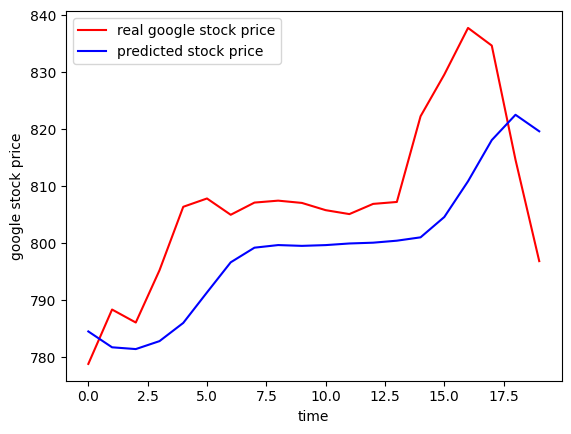

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

dataset_train = pd.read_csv('//content//Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
Y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60:i, 0])
    Y_train.append(training_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

dataset_test = pd.read_csv('//content//Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color='red', label='real google stock price')
plt.plot(predicted_stock_price, color='blue', label='predicted stock price')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()
